In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('housing_data.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3724850,3481,3,2,3,no,no,no,no,no,1,yes,unfurnished
1,4529408,8175,3,1,2,yes,no,yes,no,no,0,no,semi-furnished
2,1877898,7341,2,1,3,yes,yes,yes,no,no,1,no,semi-furnished
3,1790689,7541,2,1,1,yes,yes,no,no,no,1,yes,semi-furnished
4,2420738,6577,3,1,2,yes,no,yes,no,no,0,no,unfurnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             1500 non-null   int64 
 1   area              1500 non-null   int64 
 2   bedrooms          1500 non-null   int64 
 3   bathrooms         1500 non-null   int64 
 4   stories           1500 non-null   int64 
 5   mainroad          1500 non-null   object
 6   guestroom         1500 non-null   object
 7   basement          1500 non-null   object
 8   hotwaterheating   1500 non-null   object
 9   airconditioning   1500 non-null   object
 10  parking           1500 non-null   int64 
 11  prefarea          1500 non-null   object
 12  furnishingstatus  1500 non-null   object
dtypes: int64(6), object(7)
memory usage: 152.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,4.837742e+06,5161.324000,2.444667,0.806000,1.358667,0.379333
std,1.877052e+06,2226.547308,0.792900,0.550666,0.893620,0.647858
min,-1.217150e+06,-2059.000000,0.000000,0.000000,0.000000,-1.000000
25%,3.626378e+06,3682.500000,2.000000,0.000000,1.000000,0.000000
50%,4.791895e+06,5090.000000,2.000000,1.000000,1.000000,0.000000
75%,6.058472e+06,6617.750000,3.000000,1.000000,2.000000,1.000000
max,1.039934e+07,13066.000000,5.000000,3.000000,4.000000,3.000000


In [7]:
# Give a quick summary of missing values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There is no missing values.

In [8]:
df.duplicated().sum()

0

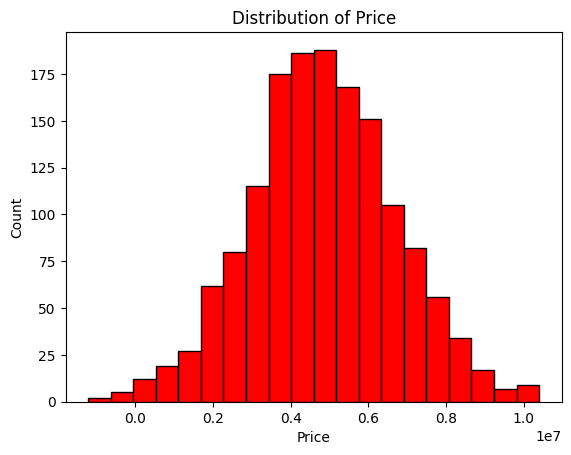

In [9]:
plt.hist(df["price"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Why is there a negative price?

In [10]:
df[df["price"] < 0]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,-183041,5876,2,1,3,yes,yes,no,no,no,0,no,semi-furnished
57,-193903,7818,2,1,1,no,no,no,no,no,0,no,semi-furnished
223,-106036,7208,3,1,2,yes,no,no,no,no,0,no,semi-furnished
575,-519603,5460,2,1,1,yes,yes,yes,no,no,1,no,unfurnished
822,-31988,4699,4,1,1,yes,yes,no,no,no,0,yes,furnished
1075,-1217150,3923,2,1,1,yes,no,yes,no,no,0,no,semi-furnished
1127,-975930,8972,3,1,2,yes,no,no,no,no,1,no,furnished
1255,-571333,6086,3,1,1,yes,no,no,no,no,0,no,unfurnished


In [11]:
df = df[df["price"] > 0]

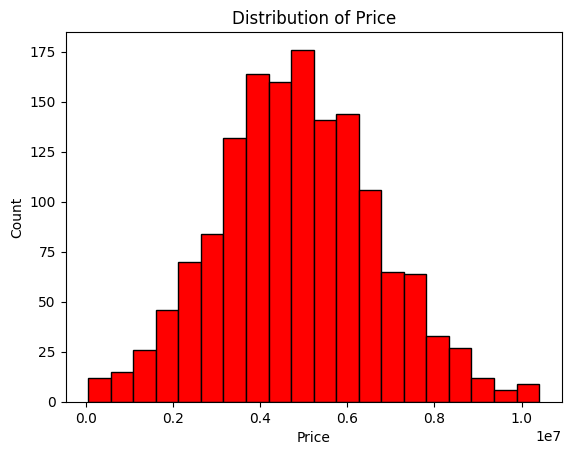

In [12]:
plt.hist(df["price"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000
mean,4.866228e+06,5155.458445,2.443700,0.804960,1.357909,0.380027
std,1.840951e+06,2228.149025,0.793278,0.551957,0.894456,0.648749
min,6.029800e+04,-2059.000000,0.000000,0.000000,0.000000,-1.000000
25%,3.635928e+06,3672.500000,2.000000,0.000000,1.000000,0.000000
50%,4.806088e+06,5080.000000,2.000000,1.000000,1.000000,0.000000
75%,6.063283e+06,6614.750000,3.000000,1.000000,2.000000,1.000000
max,1.039934e+07,13066.000000,5.000000,3.000000,4.000000,3.000000


It seems like the price, there is a normal distribution with a mean of 4.866228e+06 and a standard deviation of 1.840951e+06. That means that the price is normally distributed.

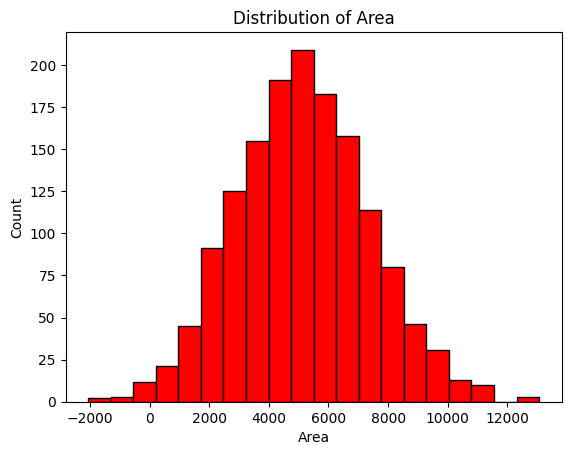

In [14]:
plt.hist(df["area"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Area")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()

Negative area doesn't make sense too. I plan to remove it.

In [15]:
# Remove negative areas
df = df[df["area"] > 0]

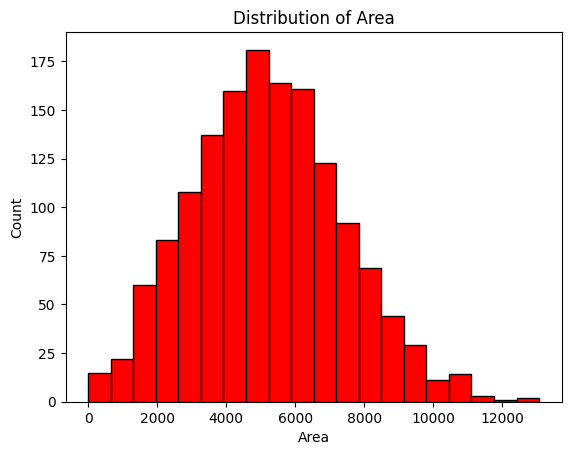

In [16]:
plt.hist(df["area"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Area")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()

Great, we have cleaned up our data.

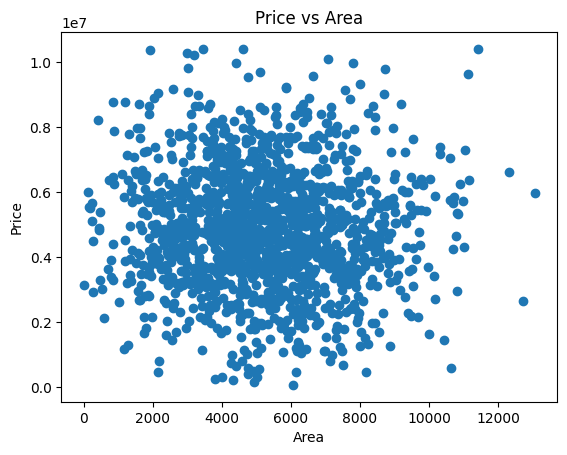

In [17]:
# Create chart of price vs area
plt.scatter(df["area"], df["price"])
plt.title("Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

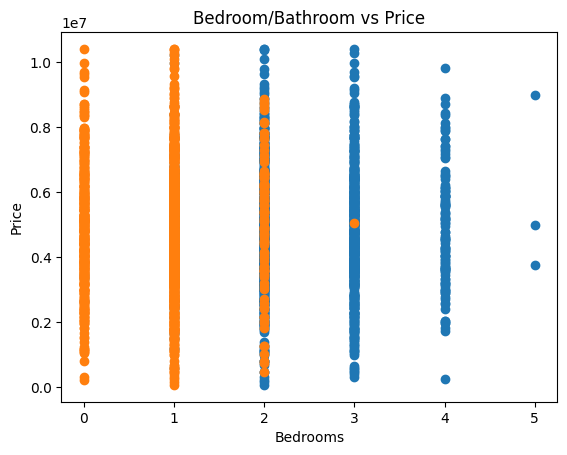

In [19]:
# Bedroom/Bathroom vs Price
plt.scatter(df["bedrooms"], df["price"])
plt.scatter(df["bathrooms"], df["price"])
plt.title("Bedroom/Bathroom vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

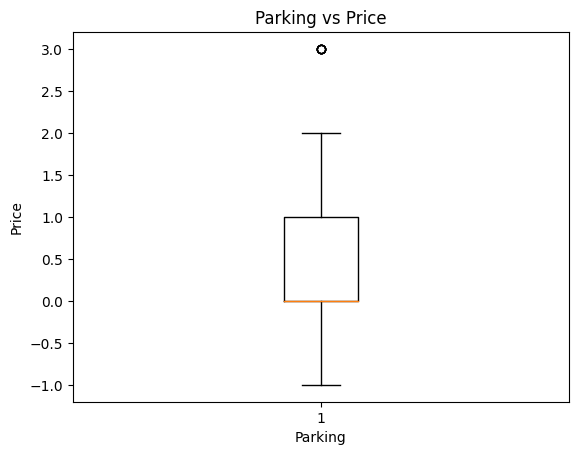

In [20]:
#Box Plot to compare house prices based on the number of parking spaces
plt.boxplot(df["parking"])
plt.title("Parking vs Price")
plt.xlabel("Parking")
plt.ylabel("Price")
plt.show()

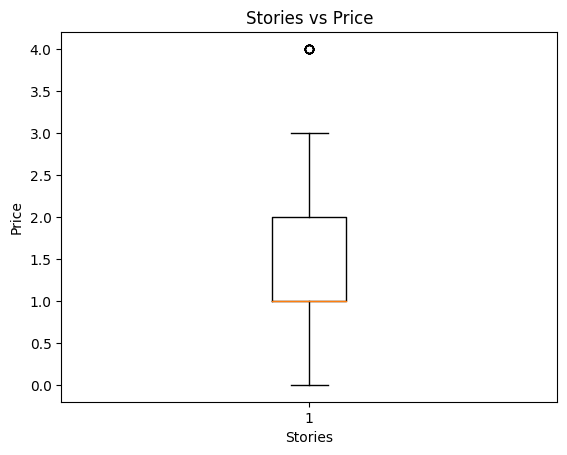

In [21]:
#Box Plot to see distribution for different numbers of stories
plt.boxplot(df["stories"])
plt.title("Stories vs Price")
plt.xlabel("Stories")
plt.ylabel("Price")
plt.show()